<a href="https://colab.research.google.com/github/Piaiai/My-pets/blob/master/ORO_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
!unzip -uq "/content/ОРО_Лб_4_jpg"

In [ ]:
import os
img_path = "/content/ОРО_Лб_4_jpg"
images = os.listdir(img_path)

def toImpulse(img, coef=1.2): # img - > 3dim numpy array, returns impulse image
    bmp = np.zeros(shape=(img.shape[0], img.shape[1], 1), dtype=np.float)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            bmp[i][j] = sum(img[i][j]) / 3

    sum_ = 0
    max_ = np.amax(bmp)
    final = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_ += bmp[i][j]
            if sum_ >= coef * max_:
                final[i][j] = 1
                sum_ -= coef * max_
            else:
                final[i][j] = 0

    return final

def rectangleBound(img): # input - image nd3, output -> point for rectangle
    img_blur = cv2.bilateralFilter(img, d = 7, sigmaSpace = 75, sigmaColor =75)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    a = img_gray.max()  
    _, thresh = cv2.threshold(img_gray, a/2, a,cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(image = thresh, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)
    c_0 = contours[0]
    x, y, w, h = cv2.boundingRect(c_0)
    return (x-10, y-10, w+20, h+20)



for i, image in enumerate(images):
    img = cv2.imread(img_path + '/' + image, 1)
    impulse = toImpulse(img, 1.4)

    x, y, w, h = rectangleBound(img)
    img_copy, img_copy2 = img.copy(), impulse.copy()
    img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)
    img_box2 = cv2.rectangle(img_copy2, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

    plt.figure(figsize=(15,10))
    plt.subplot(231),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Оригинальное изображение:'), plt.xticks([]), plt.yticks([])
    plt.subplot(232),plt.imshow(img_box2)
    plt.title('Импульсивоное изображение'), plt.xticks([]), plt.yticks([])
    plt.subplot(233),plt.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
    plt.title('Окно захвата: '), plt.xticks([]), plt.yticks([])
    plt.show()

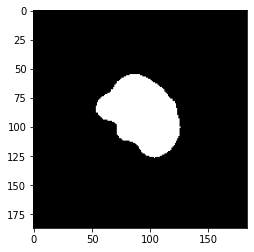

In [ ]:
img = cv2.imread(img_path + '/' + images[0], 1)
impulse = toImpulse(img, 1.4)

img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Apply the thresholding
a = img_gray.max()  
_, thresh = cv2.threshold(img_gray, a/2, a,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


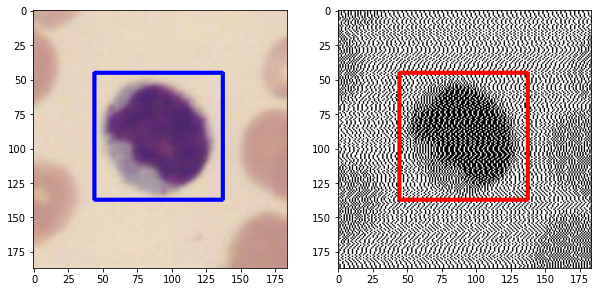

In [ ]:
def rectangleBound(img):
    img_blur = cv2.bilateralFilter(img, d = 7, sigmaSpace = 75, sigmaColor =75)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    a = img_gray.max()  
    _, thresh = cv2.threshold(img_gray, a/2, a,cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(image = thresh, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)
    c_0 = contours[0]
    x, y, w, h = cv2.boundingRect(c_0)
    return (x-10, y-10, w+20, h+20)


img = cv2.imread(img_path + '/' + images[0], 1)
x, y, w, h = rectangleBound(img)
img_copy, img_copy2 = img.copy(), impulse.copy()
img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)
img_box2 = cv2.rectangle(img_copy2, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2); plt.imshow(img_box2)

In [ ]:
import numpy as np

arr = np.arange(27).reshape(3, 3, 3)
arr = np.average(arr, 2).reshape(3, 3, 1)
arr

array([[[ 1.],
        [ 4.],
        [ 7.]],

       [[10.],
        [13.],
        [16.]],

       [[19.],
        [22.],
        [25.]]])

In [ ]:
def optimizedImpulse(image, coef=1.0):
    bmp = np.average(arr, 2).reshape(3,3,1)